<a href="https://colab.research.google.com/github/jayasuneja/FWE458_Spring25/blob/main/Lecture%20Notes/FWE458_LectureNotes_L11_L15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 11: Time Series Analysis

1. Definition and Importance of Time Series Analysis
* Time series = sequence of observations recorded at regular time intervals
* Crucial for understanding underlying patterns to forecast future values

2. Components of Time Series
* Trend = long-term movement of data over time, either up or down
* Seasonality = patterns that repeat at regular intervals, such as weekly, monthly, quarterly
* Cyclical patterns = fluctuations occurring at irregular intervals, influenced by economic or other external factors
* Irregularity (noise) = random variation in the series

3. Python Libraries Overview
* pandas for data manipulation and analysis
* NumPy for numerical computing
* matplotlib for plotting graphs
* statsmodels for implementing statistical models

4. Basics for Handling Time Series Data in Python

Time Series Data Structures
* pandas DateTimeIndex for handling dates and times
* conversion functions like pd.to_datetime() for converting string dates to datetime objects


## Indexing Time Series Data Using *Dates*

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


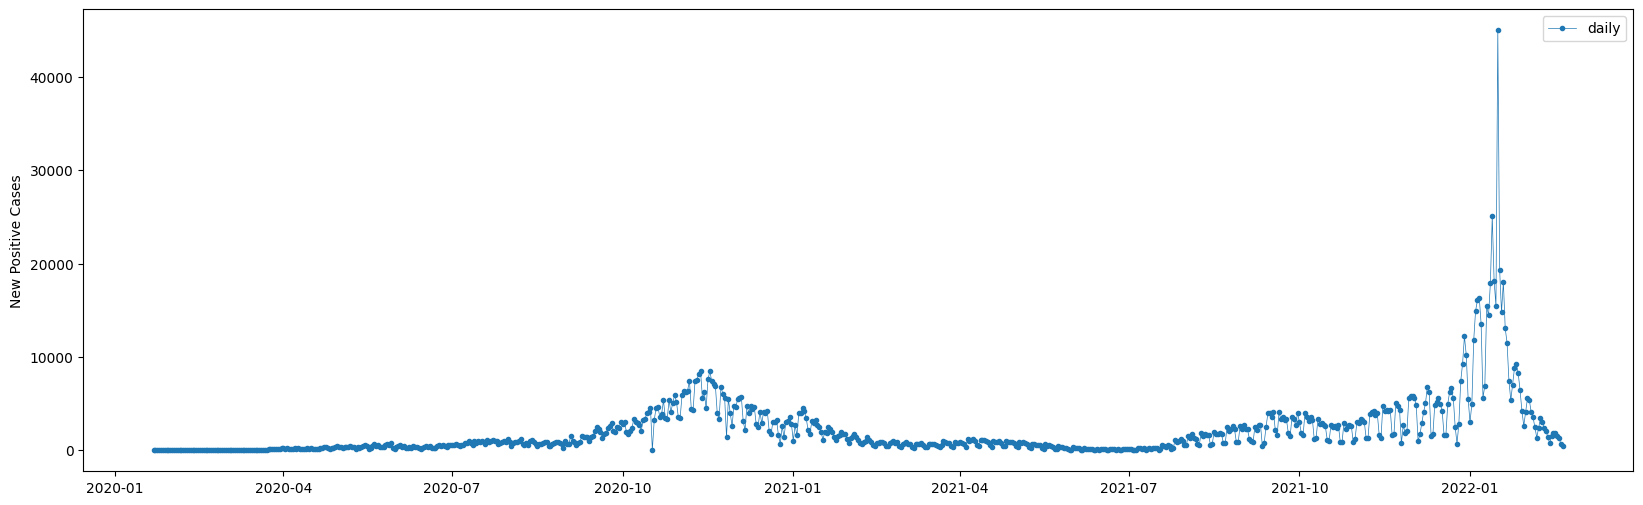

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# mounting drive
from google.colab import drive
drive.mount('/content/drive')
filedir = '/content/drive/MyDrive/FWE458/'
fname = filedir + "COVID19-Historical-V2-ST.csv"

# getting data
covid = pd.read_csv(fname)
covid = covid[["Date","POS_NEW_CP"]]

# date index
covid['Date'] = pd.to_datetime(covid['Date'])
covid = covid.set_index('Date')

# plotting the time series
fig, ax = plt.subplots(figsize = (20,6))
ax.plot(covid.POS_NEW_CP, marker = '.', linestyle = '-', linewidth = 0.5, label = 'daily')
ax.set_ylabel('New Positive Cases')
ax.legend()

## Slicing Data to Obtain Specific Time Periods

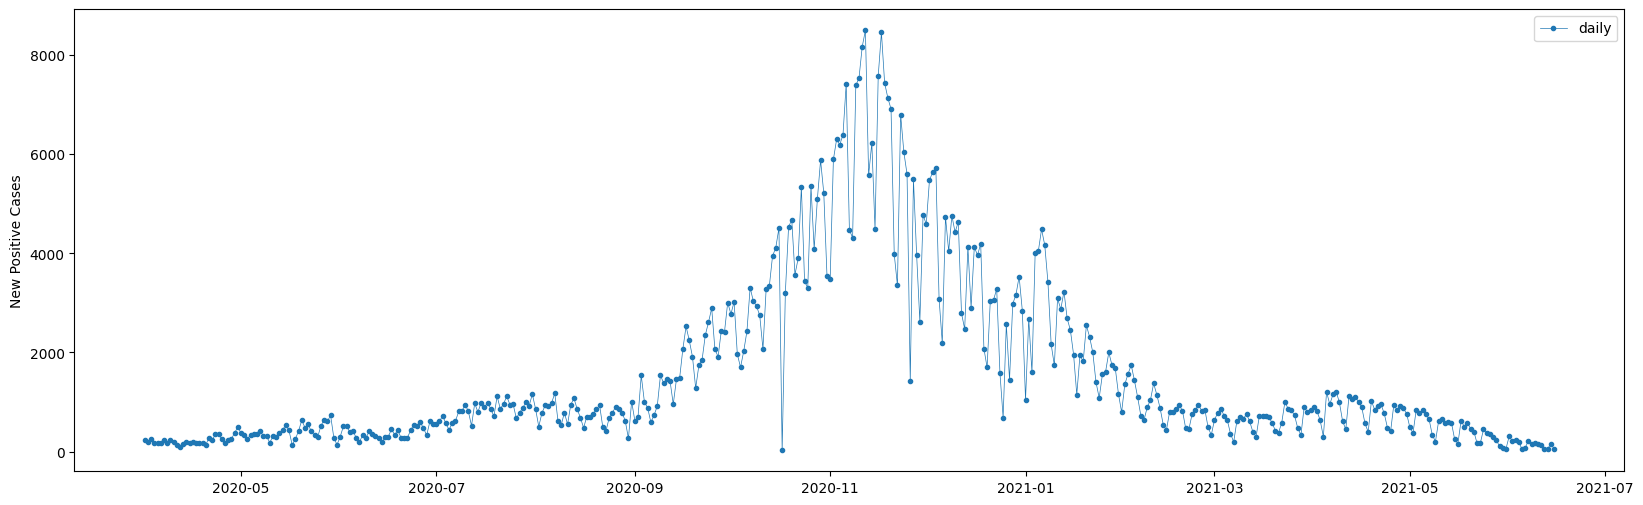

In [12]:
covid = pd.read_csv(fname)
covid['Date'] = pd.to_datetime(covid['Date'])
covid = covid.set_index('Date')

# slicing data
covid = covid.loc['2020-04-01':'2021-06-15']

fig, ax = plt.subplots(figsize = (20,6))
ax.plot(covid.POS_NEW_CP, marker = '.', linestyle ='-', linewidth = 0.5, label = 'daily')
ax.set_ylabel('New Positive Cases')
ax.legend()


## Aggregating Data Over Time Using resample()


<ipython-input-13-940f9d16d866>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax.plot(covid.POS_NEW_CP.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Resample')
<ipython-input-13-940f9d16d866>:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ax.plot(covid.POS_NEW_CP.resample('Y').mean(),marker='o', markersize=8, linestyle='-', label='Yearly Resample')


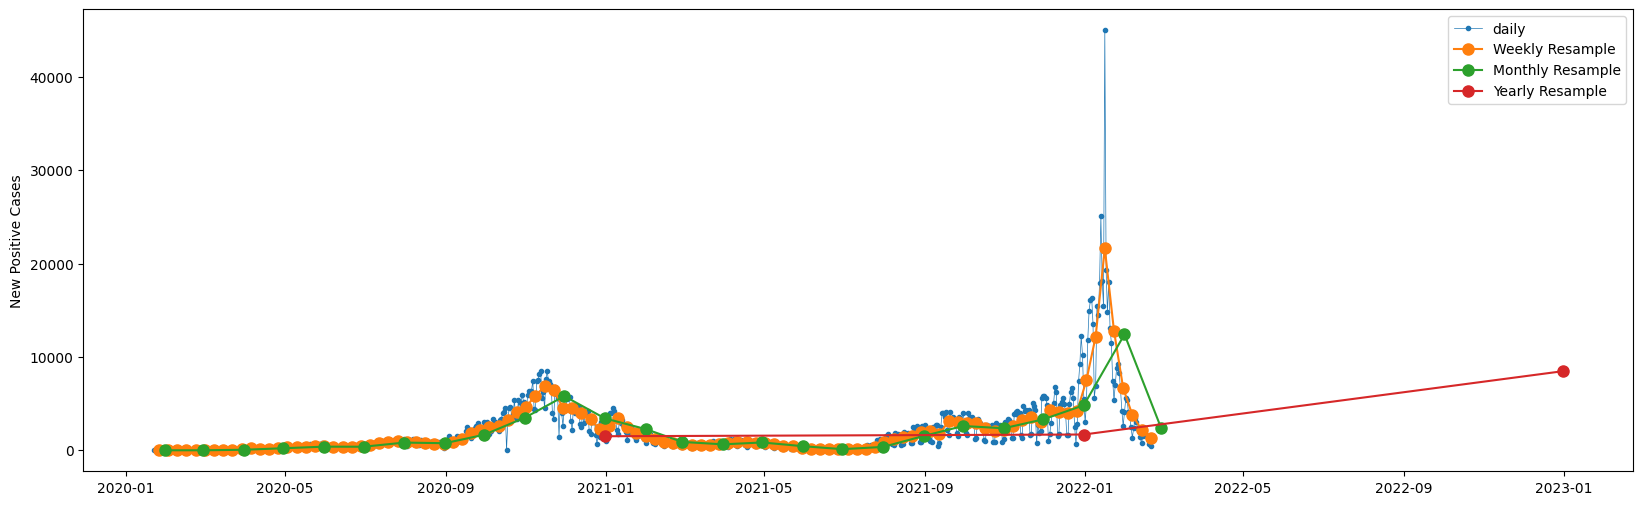

In [13]:
covid = pd.read_csv(fname)
covid['Date'] = pd.to_datetime(covid['Date'])
covid = covid.set_index('Date')

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(covid.POS_NEW_CP, marker='.', linestyle='-', linewidth=0.5, label='daily')
ax.plot(covid.POS_NEW_CP.resample('W').mean(),marker='o', markersize=8, linestyle='-', label='Weekly Resample')
ax.plot(covid.POS_NEW_CP.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Resample')
ax.plot(covid.POS_NEW_CP.resample('Y').mean(),marker='o', markersize=8, linestyle='-', label='Yearly Resample')

ax.set_ylabel('New Positive Cases')
ax.legend()

## Moving Average

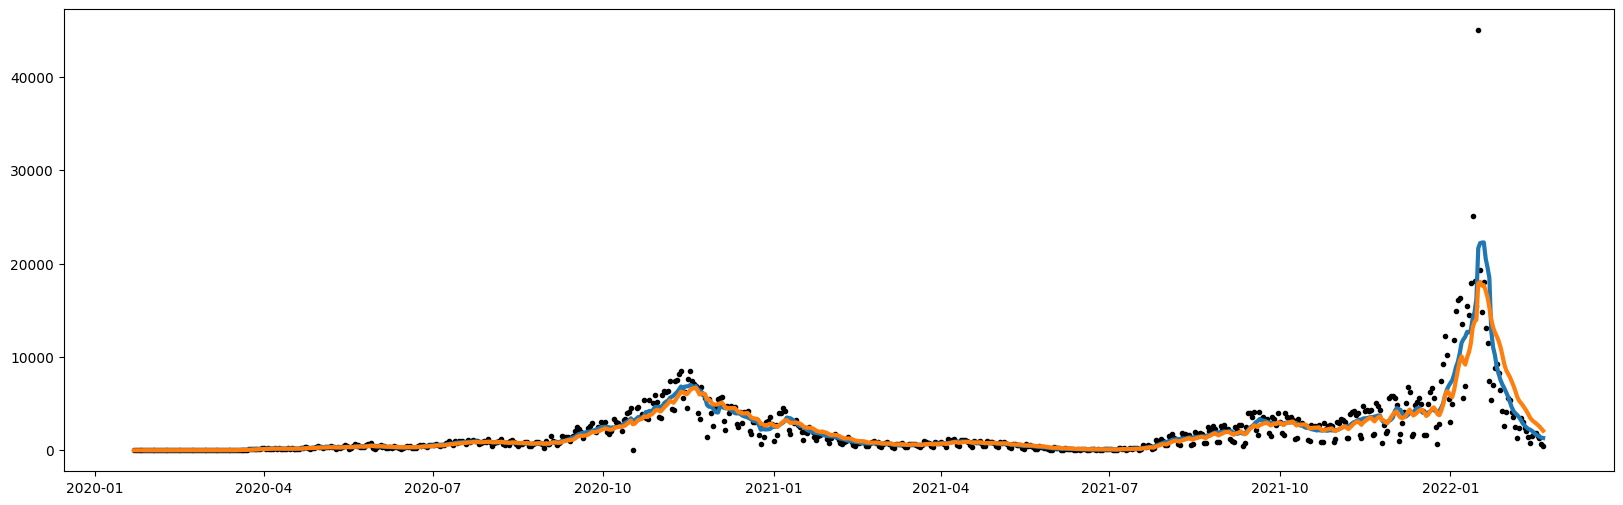

In [14]:
# moving average
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(covid.POS_NEW_CP, 'k.', label = 'daily')

# simple moving average (SMA)
ax.plot(covid.POS_NEW_CP.rolling(7).mean(), linestyle='-', linewidth=3, label='7-day moving average')

# Exponential Moving Average (EMA) - weights added
ax.plot(covid.POS_NEW_CP.ewm(7).mean(), linestyle='-', linewidth=3, label='20-day moving average')

An Exponential Moving Average (EMA) is a weighted moving average that emphasizes recent data points more heavily than older ones by applying an exponentially decreasing weight over time. This makes the EMA more responsive to recent price changes or fluctuations in the data compared to a simple moving average (SMA). The calculation uses a smoothing factor, commonly defined as α = 2/(N + 1) for a chosen period N, which determines how quickly the weights decrease for older data.

In [15]:
# Cumulative Moving Average (EMA) - the width of the window increases as duration increases
ax.plot(covid.POS_NEW_CP.expanding(7).mean(), linestyle='-', linewidth=3, label='20-day moving average')

A Cumulative Moving Average (CMA) calculates the average of all data points up to the current time, updating with each new observation by giving equal weight to all past values, which offers a stable overall trend but can be slow to reflect recent changes.

In [16]:
ax.set_ylabel('New Positive Cases')
ax.legend()

## Time Series Analysis Techniques

### Time series decomposition

Time series decomposition is a statistical method that deconstructs a time series into several components, typically including trend, seasonality, and residual (or irregular) components. This method is crucial for understanding the underlying patterns in the data, which can be particularly useful for forecasting. The statsmodels library in Python provides effecient tools for performing time series decomposition.

Components of Time Series Decomposition
1. Trend = reflects the long-term progression of the series, showing an upward or downward movement over time; it represents the increase or decrease in the data's value over a long period
2. Seasonlity = shows fluctuations that occur at specific regular intervals less than a year, such as monthly or quarterly; useful for undersatnding repetitive patterns over fixed periods
3. Residual (irregular or noise) = contains the randomness or irregular movements in the time series, not explained by the trend or seasonal components; the remainer of the time series after the trend and seasonal components have been removed

Decomposition with statsmodels

statsmodels offers two main methods for time series decomposition: additive and multiplicative
1. Additive model: used when the seasonal variations are roughly constant over time; the observed time series is the sum of the trend, seasonal, and residual components

Yt = Tt + St + Rt

2. Multiplicative model: used when the seasonal variations change proporitionally to the level of the trend; the observed time series is the product of the trend, seasonal, and residual components

Yt = Tt * St * Rt



### Examples of Time Series Decomposition Using statsmodels

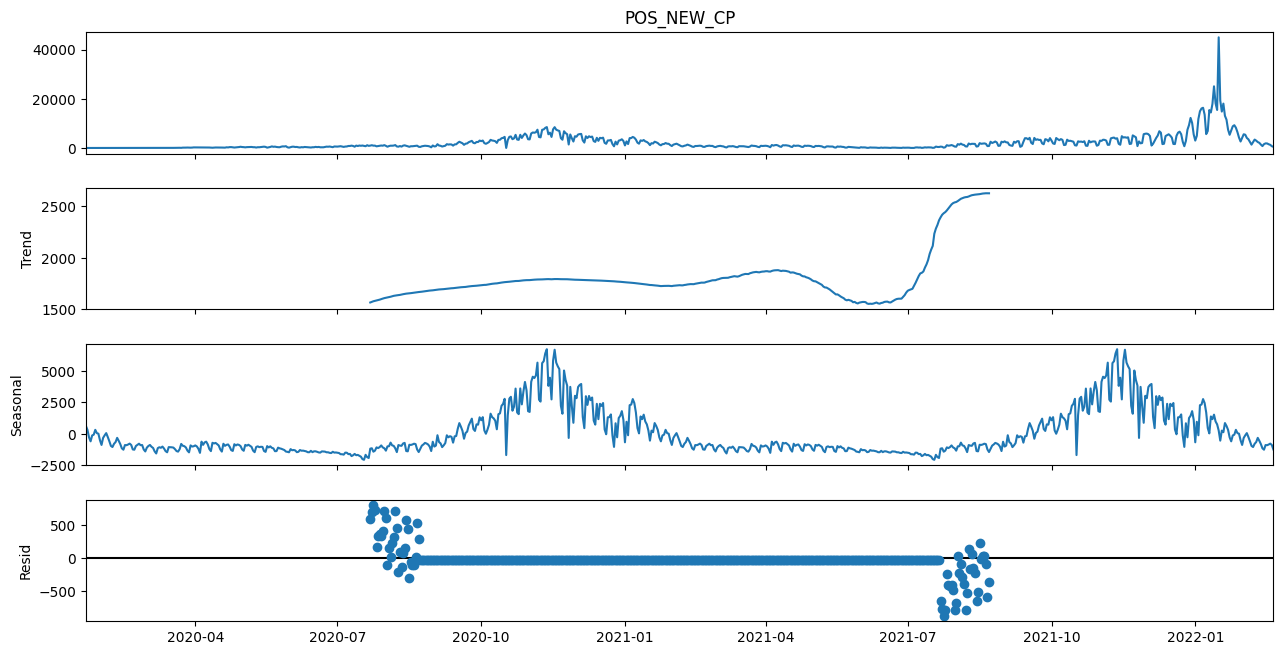

In [17]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(covid.POS_NEW_CP, model = 'additive',period = 365)
fig = decomposition.plot()
fig.set_size_inches(14,7)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-19-3a589fdf46f7>:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  co2 = pd.read_csv(fname, parse_dates = {"date": ["year", "month"]}, comment = "#")
<ipython-input-19-3a589fdf46f7>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  co2 = pd.read_csv(fname, parse_dates = {"date": ["year", "month"]}, comment = "#")


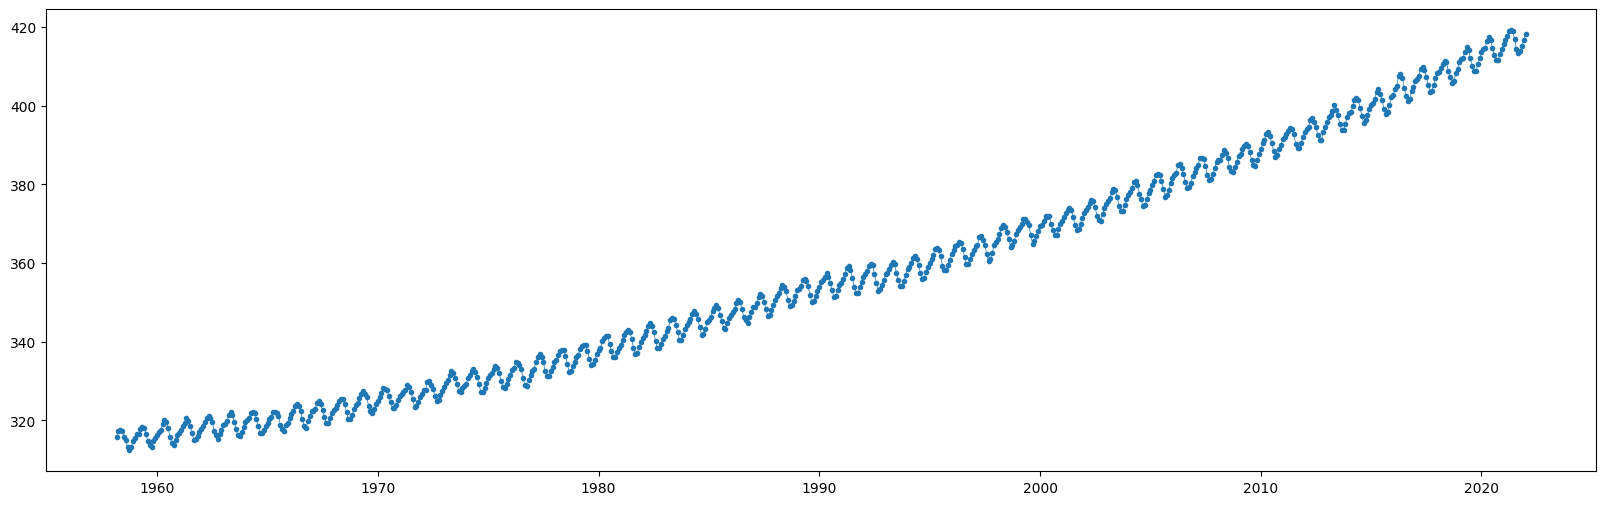

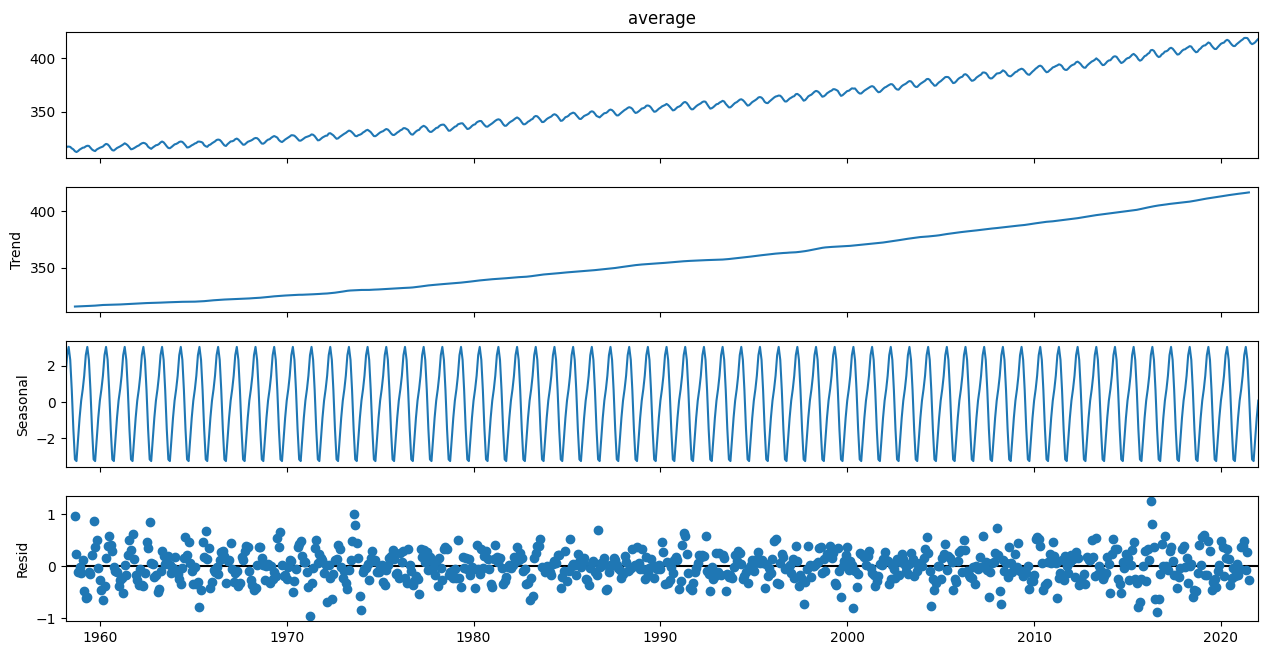

In [19]:
# do decomposition with the Mauna Loa CO2 data
# mounting drive
from google.colab import drive
drive.mount('/content/drive')
filedir = '/content/drive/MyDrive/FWE458/'
fname = filedir + "co2_mm_mlo.csv"

co2 = pd.read_csv(fname, parse_dates = {"date": ["year", "month"]}, comment = "#")
co2 = co2.set_index("date")

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(co2.average, marker='.', linestyle = '-', linewidth = 0.5, label = 'daily')


decomposition = sm.tsa.seasonal_decompose(co2.average, model = 'additive', period = 12)
fig = decomposition.plot()
fig.set_size_inches(14,7)

## Stationary vs. Non-Stationary Time Series
In time series analysis, distinguishing between stationary and non-stationary processes is fundamental. The concepts of stationarity and non-stationarity have profound implications for modeling and forecasting time series data.

### Stationary Time Series
A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, it doesn't matter when you observe a stationary series; its basic properties, like mean, variance, and autocorrelation, are constant over time. Stationarity is an important assumption in many time series analysis methods, as it implies that the time series is predictable and exhibits a regular structure over time.

Characteristics of a Stationary Time Series
* Constant mean = the average value of the series does not change over time
* Constant variance = the variability of the series remains the same over time
* Constant autocorrelation structure = how the series correlates with itself over different intervals does not change over time
* No periodic fluctuations (seasonality) = while some stationary series might exhibit cyclic behavior, where the cycles are not of a fixed length, true seasonality violates stationarity

Testing for stationarity: tools like the Augmented Dickey-Fuller (ADF) test, KPSS test, and Phillips-Perron test are commonly used


### Non-stationary Time Series
A non-stationary time series is one whose statistical properties change over time. This can manifest as a change in mean over time, a change in variance, or a change in other aspects of the series' distribution. Non-stationary data are more challenging to model and forecast due to their changing structure.

Characteristics of Non-stationary Time Series:
* Variable mean = the average value of the series may trend up or down over time
* Variable variance = the variability of the series may increase or decrease over time
* Variable autocorrelation structure =  The way in which the series' values are correlated with themselves over time may change.
* Presence of seasonality or trends = Non-stationary series often exhibit trends (either deterministic or stochastic) and/or seasonality.

Non-stationary time series analysis often involves making the series stationary before modeling. This is typically done through differencing the series, transforming the data (e.g., logarithmic transformation), or detrending.


**Why Stationarity Matters**

Many statistical forecasting methods and models (like ARIMA) assume or require the time series to be stationary to make accurate predictions. This is because stationary series have a consistent structure that can be learned and predicted over time, whereas non-stationary series do not, making their future values more unpredictable with those models.

In practice, dealing with non-stationarity is a common task in time series analysis, and identifying whether a series is stationary or non-stationary is a critical first step in selecting the appropriate modeling approach.

**An Everyday Analogy**

Think of it like baking a cake with a recipe:

**Stationary Data:**

Imagine you have a fixed recipe. Every time you bake the cake, you use the same amount of flour, sugar, and eggs. Your cakes turn out similar because the ingredients and the process are consistent.

**Non-Stationary Data:**

Now, imagine if every time you baked a cake, someone changed the recipe—sometimes more sugar, sometimes less flour. Predicting the taste of the cake becomes much harder because the recipe keeps changing.

In time series analysis, stationarity means the "recipe" (the underlying process of the data) is consistent. Without it, you're trying to predict something with shifting rules, which is much more difficult and can lead to incorrect conclusions.

### Example for testing time series stationarity


In [22]:
# ADF test
from statsmodels.tsa.stattools import adfuller

result = adfuller(co2.average)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) # if p> 0.05 Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

#KPSS test
from statsmodels.tsa.stattools import kpss
result = kpss(co2.average)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1]) # if p < 0.05 non-stationary.

ADF Statistic: 5.452249
p-value: 1.000000
KPSS Statistic: 4.295186
p-value: 0.010000


<ipython-input-22-800ed2e27ab6>:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(co2.average)


## Making Your Timeseries Stationary
Making a time series stationary is a crucial step in time series analysis, especially for models that assume stationarity, such as ARIMA (Autoregressive Integrated Moving Average). A stationary time series has constant mean and variance over time, and its autocovariance does not depend on time. Here are several methods to transform a non-stationary time series into a stationary one:

1. Differencing: Differencing is one of the most common methods to stabilize the mean of a time series by removing changes in the level of a time series, thus eliminating (or reducing) trend and seasonality.
* The first differencing involves subtracting the previous observation from the current observation:

Y(t') = Y(t) - Y(t-1)
* Seasonal differencing:  If the series has a seasonal pattern, then seasonal differencing can be effective; involves subtracting the observation from the same season in a previous cycle:

Y(t') = Y(t) - Y(t-n) where n = seasonality period

2. Transformation

Transformations such as logarithmic, square root, or power transformations can help stabilize the variance of a time series.

* Log transformation: Y(t') = log(Yt); healps stabilize a growing variance
** Use a log transformation when your time series shows exponential growth or increasing variance, as it stabilizes the variance and linearizes multiplicative relationships, making the data more stationary.

* Square root transformation: Y(t') = sqrt(Yt); can help stabilize a growing variance
** Use a square root transformation when your time series data involves count values or exhibits moderate heteroscedasticity, as it helps stabilize variance without compressing data as aggressively as a log transformation.

* Box-Cox Transformation: A more generalized approach that can stabilize variance and make the series more normal (Gaussian). The Box-Cox transformation requires a parameter, lambda:
** Yt'(lambda) = (Yt(^lambda) - 1)/lambda
where lambda is not 0 and Y(t') = log(Yt) for lambda = 0
** Use a Box-Cox transformation when your strictly positive time series data exhibits heteroscedasticity or non-normality, as it finds the optimal power parameter to stabilize variance and approximate normality.

3. Detrending: involves removing the underlying trend in the series by:
* Subtracting the trendline: Fit a regression model to the time series and subtract the resulting trend line from the original series
* Moving average: Subtracting the moving average of a certain period can also help remove the trend, making the series more stationary

4. Decomposition: Time series decomposition involves separating the time series into trend, seasonal, and residual components. Once decomposed, you can reconstruct the series without the trend and/or seasonal components, potentially leaving a stationary residual component.



Example

MissingDataError: exog contains inf or nans

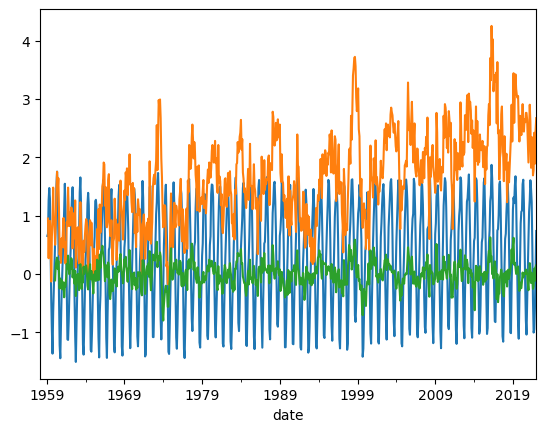

In [31]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# detrending
y = co2.average
y_detrend = (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

y_detrend.plot()
y_detrend.dropna(inplace=True)
result = adfuller(y_detrend)

# differencing

# This method removes the underlying seasonal or cyclical patterns in the time series.
y_12lag =  y - y.shift(12)
y_12lag.dropna(inplace=True)
y_12lag.plot()
adfuller(y_12lag)

# Detrending + Differencing
y_12lag_detrend =  y_detrend - y_detrend.shift(12)
y_12lag_detrend.plot()
adfuller(y_12lag_detrend)

## ARMA (Autoregressive Moving Average)
The ARMA model is a cornerstone of time series analysis and combines two major components: autoregressive (AR) and moving average (MA). It's designed to model time series data that is stationary, meaning the series has a constant mean and variance over time, and its covariance is independent of the time at which the series is observed.

Components of ARMA:
* Autoregressive (AR) part (p): This component models the current value of the time series as a linear combination of its previous values. The parameter
represents the order of the AR part, indicating the number of lagged observations included in the model
* Moving Average (MA) part (q): This component models the current value of the series as a linear combination of the past error terms (the differences between past observations and predictions). The parameter
represents the order of the MA part, indicating the number of lagged error terms included.

## ARIMA (Autoregressive Integrated Moving Average)
ARIMA extends the ARMA model to include integration (I), making it suitable for analyzing non-stationary time series. The integration part involves differencing the time series one or more times to make it stationary.

Components of ARIMA:
* Autoregressive (AR) part (p): Same as in ARMA, it models the current value as a function of its previous values.
* Integrated (I) part (d): This represents the order of differencing required to make the series stationary. Differencing is the process of subtracting the current observation from the previous observation. If
differencing operations are required to achieve stationarity, the model is said to be integrated of order
* Moving Average (MA) part (q): As with ARMA, it models the current value using the past forecast errors


The ARIMA model can thus be represented as ARIMA(p,d,q), where:
* p= order of the autoregressive part
* d = degree of first differencing involved
* q = order of the moving average part


Usage and Applications
* ARMA is best suited for stationary time series without trend and seasonal components.
* ARIMA is versatile and can handle a wide range of time series, including those with trends but not seasonal patterns.
* For seasonal data, an extension of ARIMA known as Seasonal ARIMA (SARIMA) is often used, which incorporates seasonal differencing along with additional seasonal AR and MA terms.
* These models are fundamental in forecasting, allowing for predictions based on past values and the errors associated with those past predictions. Correctly specifying the p, d, and q
parameters is crucial for the success of these models, often achieved through iterative testing and model selection criteria such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion).

### Example of ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

                               SARIMAX Results                                
Dep. Variable:                average   No. Observations:                  767
Model:                ARIMA(10, 2, 3)   Log Likelihood                -312.596
Date:                Thu, 27 Feb 2025   AIC                            653.193
Time:                        21:35:51   BIC                            718.151
Sample:                    03-01-1958   HQIC                           678.200
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3656      0.070      5.258      0.000       0.229       0.502
ar.L2         -0.6722      0.043    -15.644      0.000      -0.756      -0.588
ar.L3         -0.2772      0.042     -6.532      0.0

ValueError: x and y must have same first dimension, but have shapes (67,) and (68,)

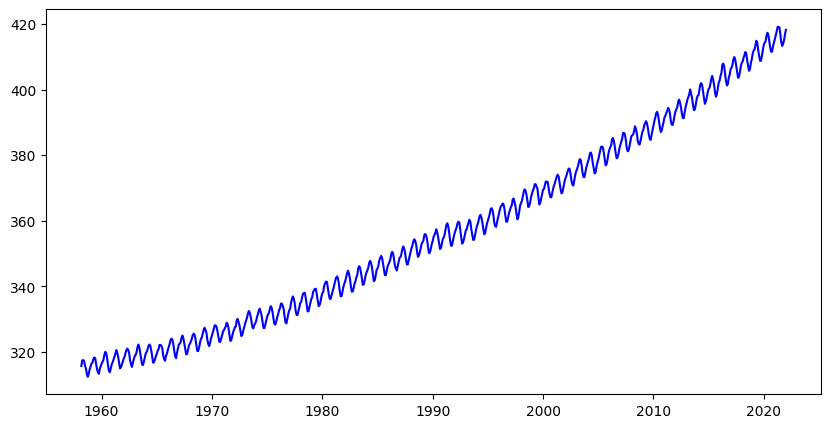

In [37]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'co2' is a DataFrame and 'average' is the column of interest
model = ARIMA(co2['average'], order=(10, 2, 3))
results_ARIMA = model.fit()

# Print model summary
print(results_ARIMA.summary())

# Define the start and end points for prediction
start = 700
end = len(co2)  # Forecast until the end of the dataset

# Generate forecast
forecast = results_ARIMA.predict(start=start, end=end, dynamic=False)

# Plot the actual data
plt.figure(figsize=(10, 5))
plt.plot(co2.index, co2['average'], label="Actual Data", color="blue")
plt.plot(co2.index[start:end+1], forecast, label="ARIMA Prediction", color="red", linestyle="dashed")

# Add labels and legend
plt.xlabel("Time")
plt.ylabel("CO2 Levels")
plt.title("ARIMA Model Prediction")
plt.legend()
plt.show()
